# Machine Learning Regression Problem 

## Predicting Price of a House


# Using Pytorch

In [ ]:
"""
step 1. Pre-process:
        Find the 'numeric' data and process (mean, std) the 'numeric' data
        Complete the 'object' data without Nan

step 2. Prepare dataset converting to the tensor type

step 3. Create model

step 4. Train model

step 5. Predict the test.csv, meanwhile, upload the result.csv
"""

In [1]:
import torch.nn as nn
import torch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import time

In [114]:
#df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
#df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
data_path ="/home/gitika/My_Home/Python_ML_CNN/ML_Data/"
save_fig_path = "/home/gitika/My_Home/Python_ML_CNN/ML_Figures/"
importfile = data_path+"Melbourne_housing_FULL.csv" 

melbourne_data =  pd.read_csv(importfile)
print(melbourne_data.describe())



              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

In [6]:
from sklearn.model_selection import train_test_split

print(melbourne_data.columns)
y = melbourne_data.Price
X = melbourne_data.drop('Price',axis=1)

#Split the data into training set and testing set and then use created csv files
df_train_X, df_test_X, df_train_y, df_test_y = train_test_split(X, y, train_size=0.6,random_state=10)

df_train = pd.concat([df_train_X,df_train_y],axis=1)
df_test = pd.concat([df_test_X,df_test_y],axis=1)
df_all_new = pd.concat([X,y],axis=1)

#df_train.to_csv("./Melbourne_housing_FULL_train.csv", columns=df_train.columns, index=False)
#df_test.to_csv("./Melbourne_housing_FULL_test.csv", columns=df_test.columns, index=False)
df_all_new.to_csv(data_path+"Melbourne_housing_FULL_updated.csv", columns=df_test.columns, index=False)

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [122]:
df_all_orig = pd.read_csv(data_path+"Melbourne_housing_FULL_updated.csv")
df_all_orig=df_all_orig.dropna(axis=0)
df_all_orig =df_all_orig[:2000]

#print(df_all.describe())
print("df_all shape:", df_all_orig.shape)
target_feature = "Price"

means = df_all_orig[target_feature].mean()
maxs = df_all_orig[target_feature].max()
mins = df_all_orig[target_feature].min()

numeric_features_index_old = df_all_orig.dtypes[df_all_orig.dtypes != 'object'].index

#normalize the data set
df_all_orig[numeric_features_index_old] = df_all_orig[numeric_features_index_old].apply(lambda x: (x - x.mean()) / (x.std()))

#Note that in target feature values empty values are not replaced by 0. But target feature column is normalized 
target_feature_val = df_all_orig[target_feature] 

#replace the empty values by 0
df_all_orig[numeric_features_index_old] = df_all_orig[numeric_features_index_old].fillna(0)
print(df_all_orig.head())

label_features_index = numeric_features_index_old[-1]
object_feature_index = df_all_orig.dtypes[df_all_orig.dtypes == 'object'].index


df_all shape: (2000, 21)
        Suburb          Address     Rooms Type Method SellerG       Date  \
2   Abbotsford  25 Bloomburg St -0.988056    h      S  Biggin  4/02/2016   
4   Abbotsford     5 Charles St  0.027418    h     SP  Biggin  4/03/2017   
6   Abbotsford      55a Park St  1.042892    h     VB  Nelson  4/06/2016   
11  Abbotsford     124 Yarra St  0.027418    h      S  Nelson  7/05/2016   
14  Abbotsford    98 Charles St -0.988056    h      S  Nelson  8/10/2016   

    Distance  Postcode  Bedroom2  ...       Car  Landsize  BuildingArea  \
2  -1.896703 -0.594227 -0.957299  ... -1.750238 -0.658562     -0.615723   
4  -1.896703 -0.594227  0.074829  ... -1.750238 -0.713770      0.000239   
6  -1.896703 -0.594227  0.074829  ...  0.472286 -0.748902     -0.069166   
11 -1.896703 -0.594227  1.106957  ... -1.750238 -0.435222      0.520769   
14 -1.896703 -0.594227 -0.957299  ...  0.472286 -0.407618     -0.372808   

    YearBuilt         CouncilArea Lattitude  Longtitude  \
2   -1.6

In [124]:
#remove the target feature column 
new_all = df_all_orig.drop(label_features_index,axis=1)

#Include the following line if subjective features are to be added as columns also by using dummies
#new_all = pd.get_dummies(df_all, dummy_na=False)
#print("the shape of preprocessed train data:",new_all.shape)

#remove other subjective columns if they are not midified by dummy values
new_all = new_all.drop(object_feature_index,axis=1)

input_feature_size = new_all.shape[1] # number of input features used for training
print(f"the linear input size is {input_feature_size}")
#inp_feature_index = new_all.dtypes[new_all.dtypes != 'object'].index


the linear input size is 12


In [126]:
#convert the input training data into pytorch tensor format

X_data = new_all # this data has features over which training is based
y_data = target_feature_val #this data is normalized 

train_features = torch.tensor((X_data.values), dtype=torch.float32) #input training data rows only values

train_labels = torch.tensor((y_data.values.reshape(-1,1)), dtype=torch.float32) #target feature values as column vector

#combine features and labels into a single dataset object for easier handling during model training. 
#E.g train_features[0] with train_labels[0]
dataset = torch.utils.data.TensorDataset(train_features,train_labels)


#training data set is split into 80% training and 20 % validation data sets
temp_num = int(len(dataset) * 0.80)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [temp_num, len(dataset) - temp_num])

print("the train dataset has ",len(train_dataset))
print("the val dataset has ",len(val_dataset))

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = 32)

the train dataset has  1600
the val dataset has  400


In [128]:
# step 3
class HousePricesPredict(nn.Module):
    def __init__(self, input_channels):
        super(HousePricesPredict, self).__init__()
        
        self.classifier = nn.Sequential(
            nn.Linear(input_channels, 1024),
            nn.Tanh(),
            nn.Linear(1024, 4096),
            nn.Tanh(),
            nn.Linear(4096, 4096),
            nn.Tanh(),
            nn.Linear(4096, 1024),
            nn.Tanh(),
            nn.Linear(1024, 1024),
            nn.Tanh(),
            nn.Linear(1024, 1),
        )

    def forward(self, x):
        x = self.classifier(x)
        return x


In [130]:
torch.manual_seed(41)
model = HousePricesPredict(input_feature_size)
model
    

HousePricesPredict(
  (classifier): Sequential(
    (0): Linear(in_features=12, out_features=1024, bias=True)
    (1): Tanh()
    (2): Linear(in_features=1024, out_features=4096, bias=True)
    (3): Tanh()
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): Tanh()
    (6): Linear(in_features=4096, out_features=1024, bias=True)
    (7): Tanh()
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): Tanh()
    (10): Linear(in_features=1024, out_features=1, bias=True)
  )
)

In [132]:
start_time = time.time()
torch.manual_seed(41)
model = HousePricesPredict(input_feature_size)
#model

# step 4
loss_fn = nn.MSELoss()
# 1e-1
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
train_loss_all = []
test_losses = []
# 300
epoch = 100
for epoch in range(epoch):
    train_loss = 0
    train_num = 0
    test_los = 0
    test_num = 0
    mae = 0
    for step,(X, y) in enumerate(train_dataloader):
        #X, y = X.to(device), y.to(device)
        #print(X,X.size(0),y)
        #print(y)
        output = model(X)
        loss = loss_fn(output, y)
        #print("output,y",output,y)
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * X.size(0) #total error for one batch as loss is mean value for full batch
        train_num += X.size(0)
        #print(train_loss)
        #a = iedbf
    train_loss_all.append(train_loss / train_num)
    with torch.no_grad():
        for step,(X1, y1) in enumerate(val_dataset):
            output = model(X1)
            
            loss_test = loss_fn(output, y1)
            mae += mean_absolute_error(output, y1)
            test_los += loss_test.item()*X1.size(0)
            test_num += X1.size(0)
            #print(output, y1,test_los)
    test_losses.append(test_los/test_num)
# print(train_loss_all)

current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Training Took: 13.391191681226095 minutes!


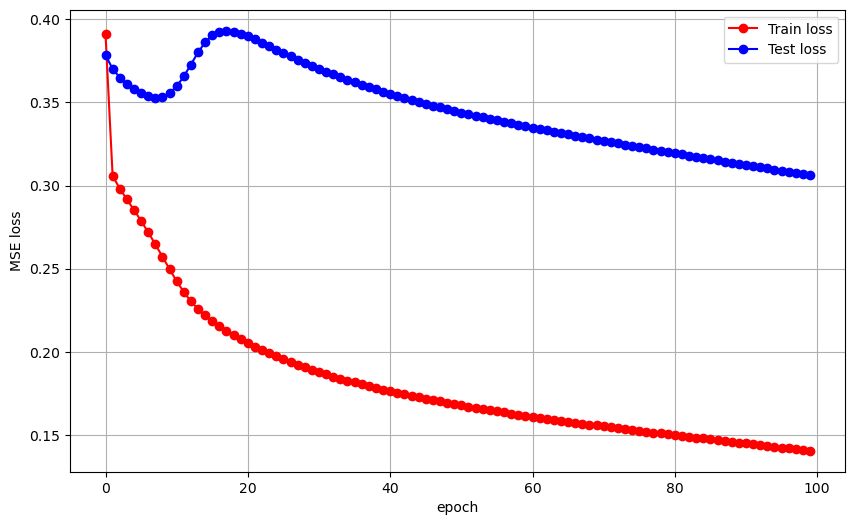

In [134]:
plt.figure(figsize=(10,6))
plt.plot(train_loss_all, "ro-", label="Train loss")
plt.plot(test_losses, "bo-", label="Test loss")
plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("MSE loss")
plt.savefig(save_fig_path+'HousePrice_loss_%s_2000.pdf'%epoch)
plt.show()

In [ ]:
test_dataset = torch.tensor((new_all[num_train:].values), dtype=torch.float32)
# print(test_dataset[0])
test_dataset = test_dataset.to(device)
# for index, X in enumerate(test_dataset):
output = model(test_dataset).to(device)
# print(output)
result = pd.DataFrame(output.cpu().data.numpy(), columns=['SalePrice'])

if np.any(result):
    result['SalePrice'] = result['SalePrice'].fillna(0)

result['SalePrice'] = result['SalePrice'] * (maxs - mins) + means
result['Id'] = np.array(result.index)
result['Id'] = result['Id'] + 1461
result = pd.DataFrame(result, columns=['Id', 'SalePrice'])
result

In [ ]:
result.to_csv("./result.csv", columns=['Id', 'SalePrice'], index=False)

# END of Code